# CSCI 3022 Homework
<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below. 

In [1]:
NAME = "Tyler Cranmer"
COLLABORATORS = ""

If you referenced any web sites or solutions not of your own creation, list those references here:

* List any external references or resources here

---

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.neighbors as neighbors
from sklearn.metrics import classification_report

# Problem 1 [30 pts]

Logistic regression uses the *logit* function to assign probabilities to predicted values. The parameters of the logit function are determined using maximum liklihood estimation. In certain cases, logistic classification fails to classify data we would consider "easy" to classify.

Create two samples of data, each of 3000 samples drawn from a $N(30,10)$ distribution that is then limited to a lower range of 5 and upper range of 50 (*i.e.* using np.min/np.max). These samples represent the ages of a random population. Call the first sample `age18` and create a second set named `age0` that is `age18-18`. Then create a vector `is_adult` that is `1` for each `age18` entry that is $\geq 18$ and 0 for all other entries.

In other words, both samples contain the same data, but `age0` is shifted by `18`. The `is_adult` vector encodes the same information for each dataset.

In [3]:
mu = 30
sigma = 10

N_30_10 = np.random.normal(mu,sigma,1000)
df = pd.DataFrame(N_30_10, columns = ['Age'])
df = df[df['Age'] >= 5]
df = df[df['Age'] <= 50]

n_30_10 = np.random.normal(mu,sigma,1000)
df2 = pd.DataFrame(n_30_10, columns = ['Age'])
df2 = df2[df2['Age'] >= 5]
df2 = df2[df2['Age'] <= 50]


age18 = np.random.choice(df['Age'],3000)
age18 = pd.DataFrame(age18, columns = ['Age'])
age18['is_adult'] = np.where(age18['Age'] >= 18, 1 , 0)
col_name='is_adult'
first_col = age18.pop(col_name)
age18.insert(0, col_name, first_col)

age0 = np.random.choice(df2['Age'],3000)
age0 = pd.DataFrame(age0, columns = ['Age'])
age0['is_adult'] = np.where(age0['Age'] >= 18, 1 , 0)
col_name='is_adult'
first_col = age0.pop(col_name)
age0.insert(0, col_name, first_col)
age0['Age'] = age0['Age'] - [18]

print("Age18")
print(age18)
print("\n\n")

print("Age0")
print(age0)

Age18
      is_adult        Age
0            1  27.905863
1            1  30.535660
2            0  15.482258
3            1  26.064895
4            1  29.899155
...        ...        ...
2995         1  37.120119
2996         0  12.861760
2997         1  22.235918
2998         1  37.343189
2999         1  33.145086

[3000 rows x 2 columns]



Age0
      is_adult        Age
0            1  21.176086
1            1  12.750618
2            1   1.431912
3            1   3.782008
4            1  19.234487
...        ...        ...
2995         1  15.467637
2996         1   3.460003
2997         1   7.855395
2998         1   6.535741
2999         0  -2.982209

[3000 rows x 2 columns]


Fit a logistic regression to the `age18` and `is_adult` dataset and print out the confusion matrix resulting from predicting the results for the `age18` dataset.

In [4]:
# your code here
y,X = patsy.dmatrices("is_adult ~ 0+Age", data=age18)

lr = sklearn.linear_model.LogisticRegression()
age18_mod = lr.fit(X,y.ravel())

yhat = age18_mod.predict(X)
yhat_p = age18_mod.predict_proba(X)

print("Age18 Confusion Matrix\n",sklearn.metrics.confusion_matrix(yhat, y.ravel()))
print('\nScore is', age18_mod.score(X,y.ravel()))

Age18 Confusion Matrix
 [[ 350    5]
 [   0 2645]]

Score is 0.9983333333333333


Fit a logistic regression to the `age0` and `is_adult` dataset and print out the confusion matrix resulting from predicting the results for the `age0` dataset.

In [5]:
# your code here

y2,X2 = patsy.dmatrices("is_adult ~ 0+Age", data=age0)

lr2 = lr = sklearn.linear_model.LogisticRegression()
age0_mod = lr2.fit(X2,y2.ravel())

yhat2 = age0_mod.predict(X2)
yhat_p2 = age0_mod.predict_proba(X2)

print("Age0 Confusion Matrix\n",sklearn.metrics.confusion_matrix(yhat2, y2.ravel()))

print('\nScore is', age0_mod.score(X2,y2.ravel()))


Age0 Confusion Matrix
 [[ 316    0]
 [   0 2684]]

Score is 1.0


Examine the two confusion matricies, comment on their relationship to each other and their ability to predict the target data. Note that since the sample data is stochastic, you may want to run the code a few times to determine a common pattern between the confusion matricies.

The two confusion matrixes are the same because they are being pulled from the same data but Age0 is Age18-18. for predicting the ages of the population, the logistic regression model does very well with correctly classifying the data. The score is almost 100%. There were 7 false positives out of the 3000 datasamples. 

To help understand these results, you will prepare two plots of the `logit` plot. In the first plot, you should plot the logitistic function using the intercept and parameter from fitting the `age18` data. In the second plot, you should plot the logitstic function using $b_0 = 0$ and varying $b_1$ from 1 to 40 --  you only need 3 or 4 values in that range. 

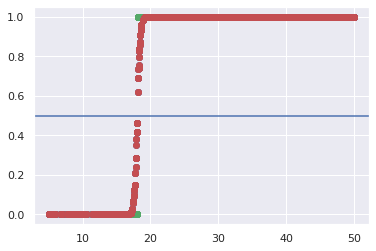

In [6]:
def logistic(model, x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return  z / (1 + z)

def logistic(model, x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return  z / (1 + z)

# your code here
plt.plot(X,yhat,'go');
plt.plot(X,yhat_p[:,1],'bo');
plt.plot(X, logistic(age18_mod, X), 'ro')
plt.axhline(0.5);


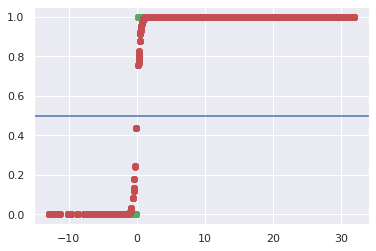

In [7]:
def logistic2(b_one, x):
    z = np.exp(0 + b_one.coef_ * x)
    return  z / (1 + z)

plt.plot(X2,yhat2,'go');
# plt.plot(X2,yhat_p2[:,1],'bo');
plt.plot(X2, logistic2(age0_mod, X2), 'ro')
plt.axhline(0.5);

Using those two plots and the two confusion matricies, explain the results from the logistic classification for `age18` and `age0`. Comment on the trend shown in the second graph of the ability of the logit to separate the values less than zero from those greater than zero; what value would likely result in a perfect separate? What happens when you re-run your logistic classification using 300,000 samples rather than 3,000?

YOUR ANSWER HERE
Both logistic classifications did a good job with classifying the ages. Each of the models had 100% accuracy. From the graphs it looks like to me that the model did not have a problem predicting the ages. Age18 did a better job predicting the ages and from the graph had an easier time seperating between 0,1. Age0 struggles alittle. When you ran the logistic classification using 300,000 samples the models was actually predicted better. 


# Problem 2 - Surviving the Titantic [30 pts]

In [8]:
ti = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')
print(ti.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


First, build a logistic classification model that maximizes the accuracy of predicting who survives the Titantic. You can use the Patsy tool to prepare the design matrix. The underlying survival rate is 0.40 and your model should achieve an accuracy of 0.80 or greater. You should print out your prediction accuracy.

In practice, you would split your data into training and testing data, but for this first set you should train and test on the full dataset.

In [9]:
# your code here
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
ti['Age'] = ti[['Age','Pclass']].apply(add_age,axis=1)
ti.drop('Cabin', axis=1,inplace=True)
ti.drop('Name', axis=1,inplace=True)
ti.drop('Ticket', axis=1,inplace=True)
ti.drop('Fare', axis=1,inplace=True)
ti.drop('Embarked', axis=1, inplace=True)
ti.drop('PassengerId', axis=1, inplace=True)

In [11]:
ti['Sex'].replace('female', 0, inplace=True)
ti['Sex'].replace('male',1,inplace=True)
ti['Sex'].astype('int64', copy=False)
ti['Age'].astype('int64', copy=False)
ti.astype('int64').dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
dtype: object

In [12]:
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [13]:

iy,iX = patsy.dmatrices("Survived ~ 0 + Pclass + Sex + Age + SibSp + Parch", data=ti)
print('y is', iy.shape, 'X is', iX.shape)
ti_mod = lr.fit(iX, iy.ravel())
print('Intercept (b0) is', ti_mod.intercept_)
print('Logistic coefficient (b1) is', ti_mod.coef_)

print('\n\n')

iyhat = ti_mod.predict(iX)
iyhat_p = ti_mod.predict_proba(iX)
print('For', iX[0], 'we get probability', iyhat_p[0])
print('Score is', ti_mod.score(iX,iy.ravel()))

y is (891, 1) X is (891, 5)
Intercept (b0) is [5.34398906]
Logistic coefficient (b1) is [[-1.22417485 -2.65406363 -0.04297501 -0.33471459 -0.06268197]]



For [ 3.  1. 22.  1.  0.] we get probability [0.90574585 0.09425415]
Score is 0.8080808080808081


Next, using your existing logistic design matrix, split the dataset into a train and test subset. The training set should use the even data elements and the testing set should use the odd. [You can easily construct the even/odd sets using numpy indexing.](https://stackoverflow.com/questions/4988002/shortest-way-to-slice-even-odd-lines-from-a-python-array) We use even/odd rather than `sklearn's train_test_split` function because it produces predictable output letting us compare multiple homework solutions. In practice, you would do something more robust.

Re-run your regression model and report the prediction accuracy.

In [14]:
ti_train= ti[::2] #Evens

ti_test = ti[1::2] #odds

train_y, train_X = patsy.dmatrices("Survived ~ 0 + Pclass + Sex + Age + SibSp + Parch", data=ti_train)

test_y, test_X = patsy.dmatrices("Survived ~ 0 + Pclass + Sex + Age + SibSp + Parch", data=ti_test)

train_mod = lr.fit(train_X,train_y.ravel())
print('Training Data Score is', train_mod.score(test_X,test_y.ravel()))

Training Data Score is 0.802247191011236


Now, use the K-Nearest Neighbors classification method to predict the survival rate and print out the prediction accuracy. You should do this first using the full dataset. Vary the $k$ to find the smallest $k \in \{2,3,4,5\}$ that maximizes the accuracy. Remember that you may want to use a different model than for logistic regression.

In [18]:
print("Train x shape: ", train_X.shape)
print("Train y shape: ", train_y.shape)
print("Test x shape: ", test_X.shape)
print("Test y shape: ", test_y.shape)

Train x shape:  (446, 5)
Train y shape:  (446, 1)
Test x shape:  (445, 5)
Test y shape:  (445, 1)


In [15]:
# your code here
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN_mod= clf.fit(iX, iy.ravel())
print('Score is', KNN_mod.score(iX,iy.ravel()))

Score is 0.8574635241301908


Now, use the K-Nearest Neighbors classification method to predict the survival rate and print out the prediction accuracy. You should now do this **using the test & train sets**. Vary the $k$ to find the smallest $k \in \{1,2,3,4,5\}$ that maximizes the accuracy.

In [16]:
# your code here
clf_t = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
train_KNN_mod=clf_t.fit(train_X,train_y.ravel())
cyhat = train_KNN_mod.predict(test_X)
cyhat_p = train_KNN_mod.predict_proba(test_X)
print('Score is', train_KNN_mod.score(test_X,test_y.ravel()))

Score is 0.750561797752809


In [17]:
print(classification_report(test_y.ravel(), cyhat))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       261
         1.0       0.75      0.60      0.66       184

    accuracy                           0.75       445
   macro avg       0.75      0.73      0.73       445
weighted avg       0.75      0.75      0.74       445



Skim through [this paper that analyzes the survival information concerning the titantic](https://www.sciencedirect.com/science/article/pii/0277953686900419?via%3Dihub). That paper uses z-test comparisons (because $n$ is "large") to compare survival rates between different groups and uses the historical Mersey investigation to attribute reasons behind the differences.

Assuming that `sklearn` could easily produce effects tables such as Table 4.3 in ISLR, describe the benefit of the logistic classification technique compared to the KNN technique for a researcher such as Wayne Hall. Then, describe the benefit of KNN for other applications. Use the terminology of ISLR 2.1.1 ("Why estimate f?") in your discussion. Assuming similar accuracy performance, which would you use if you were trying to suggest what movie to watch rather than who survived the titantic?

If you would like to compute an effects table, you can use the [`StatsModels` logit](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html) library, but I found that it depended on an older version of `scipy.stats` and it's hard to make it work, although you can make it dump out the `pvalues` table.

Logistic regression would be a better model for Wayne Hall because we can actaully predict the probabilities of certain peoples survival rate with better accuracy, while K-nearest neighbor will only classify the labels. Logistic regression actually learns while K-nearest neighbor is considered a lazy learning method. K-nearest neighbor would be great for computer vision with images. The F1 score tells you the tests accuracy. its calculated from the precision and recal of the test. With a high f1 score, you know that your model had a balance between precision and recall. For choosing a reccomended movie, the K-nearest neighbor would be best model because it will suggest movies based on your "neighest neighbor" similarities.

# Problem 3. Image Recognition using Classification [40 pts]

In this problem, you're going to use classification methods such as Logistic, LDA and KNN to classify handwritten numbers. This problem was originally posed for the US Post Office and one of the data sets was assembled by the National Institute for Standards and Technology (NIST). The problem is now a standard problem in machine learning. We'll see that we can get ~92% accuracy for the full problem using Logistic or LDA and about 98% accuracy using KNN.
You can also use TensorFlow to [implement a "deep learning" solution](https://www.tensorflow.org/versions/r1.1/get_started/mnist/pros) that achieves ~99% accuracy.

## Using a Small Dataset

We're going to focus on the trade-off of training time vs. prediction time and the accuracy achieved by different classification methods. We will first use a dataset that uses 1797 small 8x8 (64 pixel) images. In the code below, we load the dataset using an `sklearn` interface.

In this section, your goal will be to understand how *multinomial* classification functions and how you can use outputs of (some) classification tools to understand how certain or confidence you should be in a classification result.

In [18]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Each image is encoded as values between 0 and 16. When training the data, we view the image as a 64-element set of features or factors. We can view the image by arranging it an 8x8 array and using [pyplot's `imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) routine, as we do below:

Digit: 5
Image:
 [[ 0.  6. 13.  5.  8.  8.  1.  0.]
 [ 0.  8. 16. 16. 16. 16.  6.  0.]
 [ 0.  6. 16.  9.  6.  4.  0.  0.]
 [ 0.  6. 16. 16. 15.  5.  0.  0.]
 [ 0.  0.  4.  5. 15. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  9.  0.  0.]
 [ 0.  1.  8. 13. 15.  3.  0.  0.]
 [ 0.  4. 16. 15.  3.  0.  0.  0.]]


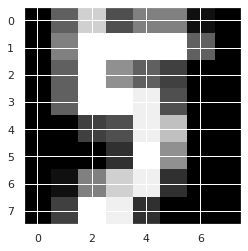

In [19]:
k=33
plt.imshow(digits.data[k].reshape(8,8), cmap=plt.cm.gray)
print('Digit:', digits.target[k])
print('Image:\n', digits.data[k].reshape(8,8))

Now, divide the `digits` dataset into a train/test split using even/odd images as before. Again, we do this to allow precise comparison o the results betwen solutions and students. 

In [20]:
dX_train, dX_test, dy_train, dy_test = digits.data[0::2], digits.data[1::2],digits.target[0::2], digits.target[1::2]
print(dX_train.shape)


(899, 64)


### Small Digits using Logistic

Use a logistic classifier fit with the training data to then predict the test data. Report the accuracy score and the confusion matrix.

In [21]:

lr = sklearn.linear_model.LogisticRegression(max_iter=3500)

In [ ]:
# your code hear
train_digit_mod = lr.fit(dX_train, dy_train.ravel())
yhat = train_digit_mod.predict(dX_test)
yhat_p = train_digit_mod.predict_proba(dX_test)
print('Test score is', train_digit_mod.score(dX_test, dy_test.ravel()))
print("Digits dataset training Data Confusion Matrix\n",sklearn.metrics.confusion_matrix(dy_test.ravel(),yhat))

Based on the test data, which pairs of digits are confused more than once? In other words, if you examine the first column, you see 2 predictions where a '0' is misclassified as a '4'; you would report this as {0,4}. Construct similar sets of confused digits for all entries confused more than 1 time. Comment on the any expected and suprising outcomes.

YOUR ANSWER HERE

{1,4}{1,8}{1,9}
{2,4}
{4,7}{4,9}
{8,2}
{9,8}{9,5}


Its interesting to see that the numbers that were miss classified were not also miss classified in thier inverse order. i.e {4,9} was miss classified but {9,4} was not. 

I also dont see any misclassification of {0,4}

The digit classification problem involves a *multinomial*, or more than two levels in the outcome. By default, the `LogisticRegression` method uses a series of binomial logistic regression fits to the different outcomes of the multinomial. [The `predict_proba` routine in `LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) returns the probability of the fit to each individual possible outcome (e.g. the digits '0' through '9'). The predicted outcome (i.e. the result of `predict`) is then the outcome with the largest predicted outcome.

For the two examples where the predicted digit is '4' but the actual digit is '0', plot the images corresponding to those digits and print out the results of `predict_proba` for those targets. In my solution to this, produced a vector of True/False values using element-wise comparisons and then [used `np.nonzeros`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nonzero.html) to extract the indicies in the test data of the "true" values (corresponding to the samples that matched '4' in my prediction but whose actual target was '0'). you may also want to use `np.round` to round up the `predict_proba` results to 3-4 digits, making it eaiser to read.

In [ ]:
# your code here
list = []
x=0
y=0

for i in range(len(yhat)):
  if yhat[i] == dy_test[i]:
    list.append(1)
    x += 1
  else:
    list.append(0)
    y += 1
print("There were ", x, " correct classications and ", y, " missclassifications")
list = np.array(list)

print("\n\n")
result = np.where(list == 0)
print("Elements with the misclassications exists at following indices", result[0], sep='\n')

#All the values that were missclassified.
#{1,4}{1,6}{1,8}{1,9} {2,4}{2,8}{3,7}{3,9}{4,0}{4,7}{4,8}{4,9}{5,9}{6,0}{6,5}{6,8}{7,9}{8,2}{8,3}{9,8}{9,5}

k = 0
predict = train_digit_mod.predict(dX_test)[result[0][k]]
print("\nDigit Target: ", predict)
print("\nPicture:")
plt.imshow(dX_test[result[0][k]].reshape(8,8), cmap=plt.cm.gray);


predict = train_digit_mod.predict_proba(dX_test)[result[0][1]]
np.round(predict)
print("\nprediction values are: ", np.round(predict))


Using the values from `predict_prob` are both mis-classified '0' values equally likely to have been classified as a '4'? Do the probabilities of the predicted outcomes comport with your visual interpretation of the digits?

YOUR ANSWER HERE
The data doesnt reflect the question of this assignment. As for the digits that are classified wrong. The prediction values are a bit off. 


### Small Digits using KNN

Now, using the K-Nearest Neighbors method to fit and predict the test and train data. Select $k \in \{1,2,3,4,5\}$ that achieves the highest accuracy. Print the accuracy score and confusion matrix for the $k$ with the highest accuracy.

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
dtrain_KNN_mod=clf_t.fit(dX_train,dy_train.ravel())
dyhat = dtrain_KNN_mod.predict(dX_test)
dyhat_p = dtrain_KNN_mod.predict_proba(dX_test)
print('Test score is', dtrain_KNN_mod.score(dX_test, dy_test.ravel()))
print("Digits dataset training Data Confusion Matrix\n",sklearn.metrics.confusion_matrix(dy_test.ravel(),dyhat))

As before, based on the test data, which pairs of digits are confused more than once?  Comment on the any expected and suprising outcomes.

{1,8}{9,5}

Both of these misclassifications were on the previous confusion matrix for the logistic Model. so the fact that the KNN model only has two misclassifications that happened more than once is pretty neat.

Selecting one pair of confused digits, print out the image and the probability estimates (`predict_proba`).

In [ ]:
print("There were ", x, " correct classications and ", y, " missclassifications")
list = np.array(list)

print("\n\n")
result = np.where(list == 0)
print("Elements with the misclassications exists at following indices", result[0], sep='\n')

#All the values that were missclassified.
#{1,4}{1,6}{1,8}{1,9} {2,4}{2,8}{3,7}{3,9}{4,0}{4,7}{4,8}{4,9}{5,9}{6,0}{6,5}{6,8}{7,9}{8,2}{8,3}{9,8}{9,5}

k = 680

print("\nDigit Target: ", dy_test[k])
print("\nPicture:")
plt.imshow(dX_test[k].reshape(8,8), cmap=plt.cm.gray);

predict = train_digit_mod.predict_proba(dX_test)[list[k]]
np.round(predict)
print("\nprediction values are: ", np.round(predict))

In [ ]:
# your code here
# your code here
is_same = []
x=0
y=0
for i in range(len(dyhat)):
  if dyhat[i] == dy_test[i]:
    is_same.append(True)
    x += 1
  else:
    is_same.append(False)
    y += 1
# print(x,y)
# print(len(dyhat))
is_same = np.array(is_same)
index = np.where(is_same == False)
# index = np.nonzero(is_same)
# print("Elements with the misclassications exists at following indices", index[0], sep='\n')

k = 14
prob_est = dtrain_KNN_mod.predict_proba(dX_test)[index[0][k]]
predicts = dtrain_KNN_mod.predict(dX_test)[index[0][k]]
print("The probability estimate is: ", np.round(prob_est))
print("The predicting digit: ", np.round(predicts))
plt.imshow(dX_test[index[0][k]].reshape(8,8), cmap=plt.cm.gray);

Comment on differences in the results of `predict_proba` between the logistic and KNN classifiers. Would the results be similar for different values of $k$ in the KNN sarch?

YOUR ANSWER HERE
The KNN works much better than the Logistic regression model. The predict_proba was almost on the money eaach time. 

### Using the larger MNIST data

We will now use the MNIST dataset, which is the same used in the TensorFlow tutorial. This dataset is large, and contiains 70,000 images each of which are 28x28 pixels.

In this section, your goal will be to understand the performance of difference classification tools and their impact on usability in an application.

We first load the dataset. This may take a while the first time because the data has to be downloaded.

In [ ]:
import sklearn.datasets
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1) 
print("Image Data Shape" , mnist.data.shape)
print("Label Data Shape", mnist.target.shape)

As before, the dataset has a `data` array of 784 features or factors that can be reorganized into an image. There is also a `target` value indicating the correct digit.

In [ ]:
k=3
plt.imshow(np.reshape(mnist.data[k], (28,28)), cmap=plt.cm.gray, label='Digit:' + str(mnist.target[k]))
print('values:', mnist.data[k].reshape(28,28))


Again, split your data into an even/odd train/test dataset using numpy indexing. You should name the data something different than your smalled 'digits' data.

In [ ]:
mX_train, mX_test, my_train, my_test = mnist.data[0::2], mnist.data[1::2],mnist.target[0::2], mnist.target[1::2]
print(mX_train.shape)

Now, train a logistic regression model on the MNIST training data. You [should prefix your fit function call using the %time "magic" command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) to measure how long the fitting process takes. 

This will take a long time for the default method we've been using to run logistic classification problems (like more than 30 minutes), in part because the default method fits $n$ binomial classification problems to determine the multinomial model. If you start using the standard solver (`liblinear`) and decide it's too slow, use the Kernel -> Interrupt menu to stop the evaluation.

Logsitic regression uses *maximum liklihood estimation* to determine the most likely outcome. There are numerous *solvers* (see [the LogisticRegression manual](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) ) that can be used and some of them are more appropriate for large multinomial problems because they fit the data to all the outcomes in one go. Find one that doesn't take forever (some should take ~15 seconds) and fit your model to the training data.

In [ ]:
lr2 = sklearn.linear_model.LogisticRegression(solver = 'saga')

In [ ]:
#your code here

%time train_mnist_mod = lr2.fit(mX_train, my_train.ravel())


Now, compute the predictions and `predict_proba` for the test dataset and use %time to determine how long the predictions take. Report the accuracy score and the confusion matrix. 

In [ ]:
# your code here
%time yhat = train_mnist_mod.predict(mX_test)
%time yhat_p = train_mnist_mod.predict_proba(mX_test)
print('Test score is', train_mnist_mod.score(mX_test, my_test.ravel()))
print("Confusion Matrix\n",sklearn.metrics.confusion_matrix(yhat,my_test.ravel()))

Now, compute the probability scores for each outcome class using `predict_proba` and plot either a histogram or KDE plot of their values. You can use the output of `predict_proba` and then use `ravel()` to turn it into single flat array suitable for feeding to `plt.hist` or `sns.kdeplot`.

In [ ]:
# your code here
my_data = yhat_p.ravel()
plt.hist(my_data, density=False);

In [ ]:
sns.kdeplot(my_data)

Linear Discriminant Analysis is supposed to be superior for multinomial classification. Run the same classification problem using LDA and time the fitting proccess.

In [ ]:
# your code here
%time ilda = LinearDiscriminantAnalysis()

Predict the outcomes and report the accuracy score and confusion matrix. Time how long it takes to run the prediction using `%time`.

In [ ]:
# your code here
LDA_model = ilda.fit(mX_train, my_train.ravel())
%time LDA_hat = LDA_model.predict(mX_test)
LDA_hatp = LDA_model.predict_proba(mX_test)
print('Test score is', LDA_model.score(mX_test, my_test.ravel()))
print("Confusion Matrix\n",sklearn.metrics.confusion_matrix(LDA_hat,my_test.ravel()))

Print the distribution of outcome probabilities from `predict_proba` using a histogram or KDE.

In [ ]:
# your code here
data = LDA_hatp.ravel()
plt.hist(data, density=False);

In [ ]:
sns.kdeplot(data)

Compare the distribution of probability of prediction values for Logistic and LDA classification. Comment on the differences and/or similarities of the range of values from `predict_proba` returned by each method.

YOUR ANSWER HERE

The two graphs looks very similar in nature. Almost identical to me. Logistic regression just took much longer to compute.

Lastly, we're going to do the same steps using the KNN algorithm. You should use $k=1$ for the KNN method and record the fitting time.

In [ ]:
# your code here
clf2 = neighbors.KNeighborsClassifier(n_neighbors=1, n_jobs=-1, weights='uniform')
%time c2train_KNN_mod=clf_t.fit(mX_train, my_train.ravel())

In [ ]:
# clf = neighbors.KNeighborsClassifier(n_neighbors=1, n_jobs=-1, weights='uniform')
# dtrain_KNN_mod=clf_t.fit(X_train, my_train.ravel())
# dyhat = dtrain_KNN_mod.predict(dX_test)
# dyhat_p = dtrain_KNN_mod.predict_proba(dX_test)
# print('Test score is', dtrain_KNN_mod.score(dX_test, dy_test.ravel()))
# print("Digits dataset training Data Confusion Matrix\n",sklearn.metrics.confusion_matrix(dy_test.ravel(),dyhat))

Now run the prediction using your KNN model. Note that this will take a long time (40 minutes?). If specify `n_jobs=-1` when you create your `KNeighborsClassifier`, then predictions will use all the cores on your computer. For example, that chnaged my 40 minute run time for the full dataset to 5 minutes.

You should first run the prediction on a small test set (e.g. perhaps every 40th sample) to make certain you're doing it right. The digits of the same outcome are usually bunched together and if you just e.g.select the first 1000 items, you'll find they only belong to one output class. Once you have your code working, run it for the full dataset.

In [ ]:
# your code here
%time c2yhat = dtrain_KNN_mod.predict(mX_test)
c2yhat_p = dtrain_KNN_mod.predict_proba(mX_test)
print('Test score is', dtrain_KNN_mod.score(mX_test, my_test.ravel()))
print("Digits dataset training Data Confusion Matrix\n",sklearn.metrics.confusion_matrix(my_test.ravel(),c2yhat))

### Comparison

Now, compare the three methods. For each method, describe the accuracy achieved, the fitting time and the prediction time. For the Logistic and LDA model, describe how the distribution of the outcome probabilities may affect the accuracy score. Assume you're trying to apply the digit classification problem in the post-office. Which method would you use? Given that the accuracy isn't 100%, what outputs of the models could you use to improve mail sorting?

YOUR ANSWER HERE
The logistic Model had an accuracy of 91% but the fitting time was excessive. It took over 2 hours to fit the data when using the Saga Solver. I left the computer running over night. the prediction time was very quick with 536ms. So that was nice. The prediction distributions were pretty drastic between 0 and 1. There was a lot of 0s predicted. The LDA Model was extremely quick with 22 seconds to fit the data but the overall accuracy was a bit weak at 85%. the prediction time was also quick at 546 ms. The Knearest neighbor was the quickest with fitting the data at 9 seconds bt the Prediction time is still running. 

So far without having the knn model complete, i would choose the Logistic Regression model to classify digits in the post office since the accuracy was the highest. I do know that KNN model does pretty well with predicting images. So if my model ever completed, i believe the KNN model would probably have the best accuracy. 